- Name: Shivam Shukla
- Roll No: 19301
- Department: EECS

# Descriptive Analysis 

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

2022-11-24 09:31:31.640202: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 09:31:31.748708: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-24 09:31:32.215349: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-24 09:31:32.215414: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

Instructions for updating:
non-resource variables are not supported in the long term


## AlexNEt method1

In [9]:
ls saved/AlexNet/m1

AlexNetm1run1.ckpt.data-00000-of-00001  AlexNetm1run2.ckpt.meta
AlexNetm1run1.ckpt.index                AlexNetm1run3.ckpt.data-00000-of-00001
AlexNetm1run1.ckpt.meta                 AlexNetm1run3.ckpt.index
AlexNetm1run2.ckpt.data-00000-of-00001  AlexNetm1run3.ckpt.meta
AlexNetm1run2.ckpt.index                checkpoint


In [10]:
with tf.Session() as sess:
    saver_alex = tf.train.import_meta_graph("saved/AlexNet/m1/AlexNetm1run1.ckpt.meta")
    saver_alex.restore(sess, "saved/AlexNet/m1/AlexNetm1run1.ckpt")
    dict1 = {}
    for i in range(1,6):
        a= sess.run("conv" + str(i) + "_1/alpha:0")
        b= sess.run("conv" + str(i) + "_1/beta:0") 
        c= sess.run("conv" + str(i) + "_1/gamma:0")
        s = a+b+c
        dict1["conv" + str(i)] = [[a/s,b/s,c/s],[a,b,c]]
    
    for i in range(6,8):
        a = sess.run("fc" + str(i) + "_1/alpha:0")
        b = sess.run("fc" + str(i) + "_1/beta:0") 
        c = sess.run("fc" + str(i) + "_1/gamma:0")
        s = a+b+c
        dict1["fc" + str(i)] = [[a/s, b/s, c/s],[a,b,c]]
sess.close()

INFO:tensorflow:Restoring parameters from saved/AlexNet/m1/AlexNetm1run1.ckpt


In [11]:
for i in dict1.keys():
    print(f"{i} = {dict1[i]}")

conv1 = [[0.33885974, 0.3242271, 0.33691317], [1.0163913, 0.97250146, 1.0105526]]
conv2 = [[0.34211746, 0.31680617, 0.34107637], [1.02572, 0.9498329, 1.0225986]]
conv3 = [[0.35180965, 0.33075857, 0.31743175], [1.0544466, 0.9913521, 0.95140886]]
conv4 = [[0.35397896, 0.331537, 0.3144841], [1.0606569, 0.9934122, 0.94231516]]
conv5 = [[0.3373175, 0.3340816, 0.32860094], [1.011772, 1.002066, 0.985627]]
fc6 = [[0.33678854, 0.32866707, 0.3345444], [1.0102568, 0.985895, 1.003525]]
fc7 = [[0.34041846, 0.2752675, 0.3843141], [1.0121126, 0.81840956, 1.1426206]]


## AlexNet Method 2

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

2022-11-24 09:23:29.976354: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 09:23:30.088310: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-24 09:23:30.569004: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-24 09:23:30.569079: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
dict1 = {}
with tf.Session() as sess1:
    saver_alex = tf.train.import_meta_graph("saved/AlexNet/m2/AlexNetm2run1.ckpt.meta")
    saver_alex.restore(sess1, "saved/AlexNet/m2/AlexNetm2run1.ckpt")
    dict1 = {}
    for i in range(1,6):
        a= sess1.run("conv" + str(i) + "_1/alpha:0")
        b= sess1.run("conv" + str(i) + "_1/beta:0") 
        c= sess1.run("conv" + str(i) + "_1/gamma:0")
        s = a+b+c
        dict1["conv" + str(i)] = [[a/s,b/s,c/s],[a,b,c]]
    
    for i in range(6,8):
        a = sess1.run("fc" + str(i) + "_1/alpha:0")
        b = sess1.run("fc" + str(i) + "_1/beta:0") 
        c = sess1.run("fc" + str(i) + "_1/gamma:0")
        s = a+b+c
        dict1["fc" + str(i)] = [[a/s, b/s, c/s],[a,b,c]]
    #     a['i'] = alpha['i']/(alpha['i'] + beta['i'] + gamma['i'])
    #     b['i'] = beta['i']/(alpha['i'] + beta['i'] + gamma['i'])
    #     c['i'] = gamma['i']/(alpha['i'] + beta['i'] + gamma['i'])
    #     A.append(a['i'])
    #     B.append(b['i'])
    #     C.append(c['i'])
sess1.close()

2022-11-24 09:23:31.327724: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-11-24 09:23:31.327745: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-11-24 09:23:31.328378: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Restoring parameters from saved/AlexNet/m2/AlexNetm2run1.ckpt


2022-11-24 09:23:31.621740: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


In [3]:
for i in dict1.keys():
    print(f"{i} = {dict1[i]}")

conv1 = [[0.33110926, 0.30222422, 0.36666656], [0.99024683, 0.9038605, 1.0965879]]
conv2 = [[0.32801628, 0.3022104, 0.36977336], [0.9806367, 0.9034875, 1.1054736]]
conv3 = [[0.33451697, 0.31568933, 0.34979376], [1.0026785, 0.9462447, 1.0484691]]
conv4 = [[0.33459172, 0.3202759, 0.34513238], [1.0033084, 0.960381, 1.0349157]]
conv5 = [[0.33128983, 0.33182177, 0.3368885], [0.9938344, 0.9954302, 1.0106298]]
fc6 = [[0.35226282, 0.3128824, 0.33485478], [1.0556804, 0.93766296, 1.003511]]
fc7 = [[0.40770772, 0.22627513, 0.36601722], [1.1912016, 0.66110915, 1.0693942]]


## LeNet

### Method 1

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

2022-11-24 09:24:01.897664: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 09:24:02.009150: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-24 09:24:02.481691: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-24 09:24:02.481761: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
with tf.Session() as sess2:
    saver1 = tf.train.import_meta_graph("saved/LeNet/m1/LeNetm1run1.ckpt.meta")
    saver1.restore(sess2, "saved/LeNet/m1/LeNetm1run1.ckpt")
#     saver1.run
    dictl = {}
    for i in range(1,3):
        a= sess2.run("conv" + str(i) + "/alpha:0")
        b= sess2.run("conv" + str(i) + "/beta:0") 
        c= sess2.run("conv" + str(i) + "/gamma:0")
        s = a+b+c
        dictl["conv" + str(i)] = [[a/s, b/s, c/s],[a,b,c]]
        
 
    a = sess2.run("fc_layer/alpha:0")
    b = sess2.run("fc_layer/beta:0") 
    c = sess2.run("fc_layer/gamma:0")
    s = a+b+c
    dictl["fc"]= [[a/s, b/s, c/s],[a,b,c]]
sess2.close()

    

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Restoring parameters from saved/LeNet/m1/LeNetm1run1.ckpt


2022-11-24 09:24:03.241101: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-11-24 09:24:03.241123: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-11-24 09:24:03.241596: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 09:24:03.385275: I tensorflow/c

In [3]:
for i in dictl.keys():
    print(f"{i} = {dictl[i]}")

conv1 = [[0.33621794, 0.33033553, 0.33344656], [1.0086266, 0.9909798, 1.0003127]]
conv2 = [[0.33905822, 0.33398592, 0.32695583], [1.0170505, 1.0018355, 0.98074776]]
fc = [[0.34921935, 0.1720933, 0.47868735], [0.9803052, 0.48308882, 1.3437392]]


### Method 2

In [4]:

with tf.Session() as sess3:
    saver2 = tf.train.import_meta_graph("saved/LeNet/m2/LeNetm2run1.ckpt.meta")
    saver2.restore(sess3, "saved/LeNet/m2/LeNetm2run1.ckpt")
#     saver1.run
    dictl2 = {}
    for i in range(1,3):
        a= sess3.run("conv" + str(i) + "/alpha:0")
        b= sess3.run("conv" + str(i) + "/beta:0") 
        c= sess3.run("conv" + str(i) + "/gamma:0")
        s = a+b+c
        dictl2["conv" + str(i)] = [[a/s, b/s, c/s],[a,b,c]]
        
 
    a = sess3.run("fc_layer/alpha:0")
    b = sess3.run("fc_layer/beta:0") 
    c = sess3.run("fc_layer/gamma:0")
    s = a+b+c
    dictl2["fc"]= [[a/s, b/s, c/s],[a,b,c]]
sess3.close()


Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Restoring parameters from saved/LeNet/m2/LeNetm2run1.ckpt


2022-11-24 09:32:53.450993: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


In [5]:
for i in dictl2.keys():
    print(f"{i} = {dictl2[i]}")

conv1 = [[0.33367178, 0.33515152, 0.33117673], [1.0010055, 1.0054448, 0.99352044]]
conv2 = [[0.3213759, 0.33128923, 0.34733486], [0.96363884, 0.99336374, 1.0414762]]
fc = [[0.47416958, 0.10667576, 0.41915467], [1.2796502, 0.28788784, 1.1311805]]


## AlexNet trainabel vs constant alpha, beta and gamma

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df1 = pd.read_csv("result/AlexNet/AlexNetm1run1data_.csv")
df2 = pd.read_csv("result/AlexNet/AlexNetonem1run1data_.csv")
df3 = pd.read_csv("result/AlexNet/AlexNetonethreem1run1data_.csv")

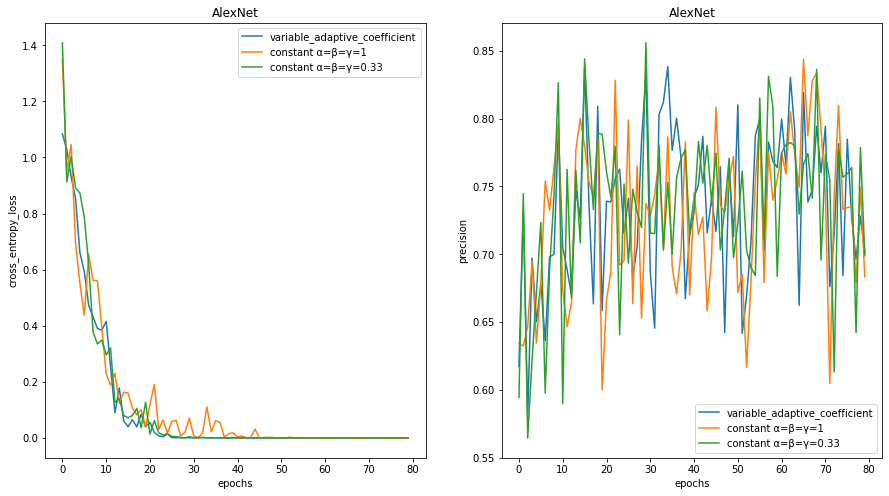

In [15]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title("AlexNet")
plt.plot(df1.cross_entropy_loss, label = "variable_adaptive_coefficient")
plt.plot(df2.cross_entropy_loss, label = "constant \u03B1=\u03B2=\u03B3=1")
plt.plot(df3.cross_entropy_loss, label = "constant \u03B1=\u03B2=\u03B3=0.33")
plt.ylabel("cross_entropy_loss")
plt.xlabel("epochs")
plt.legend()



plt.subplot(1,2,2)
plt.title("AlexNet")
plt.plot(df1.pre_test, label = "variable_adaptive_coefficient")
plt.plot(df2.pre_test, label = "constant \u03B1=\u03B2=\u03B3=1")
plt.plot(df3.pre_test, label = "constant \u03B1=\u03B2=\u03B3=0.33")
plt.ylabel("precision")
plt.xlabel("epochs")
plt.legend()

plt.savefig("result/AlexNetAnalysis.jpg")

## AlexNet precision for all the activations

In [7]:
from glob import glob
import pandas as pd

In [8]:
df_csv = glob("result/AlexNet/AlexNetonem2*.csv")

In [9]:
df_csv

['result/AlexNet/AlexNetonem2run2data_.csv',
 'result/AlexNet/AlexNetonem2run3data_.csv',
 'result/AlexNet/AlexNetonem2run1data_.csv']

In [10]:
x = pd.read_csv(df_csv[0])

In [11]:
def precision(x):
    max_e = 0
    max_p = x.pre_test[0]
    for i in range(len(x)):
        if x.pre_test[i]>x.pre_test[max_e]:
            max_e = i
            max_p = x.pre_test[i]
    last_p = x.pre_test[len(x)-1]
    return max_e, round(max_p,4), round(last_p,4)

In [12]:
precision(x)

(57, 0.871, 0.6822)

In [13]:
import numpy as np
def average(activation = "relu"):
    df_csv = glob("result/AlexNet/AlexNet" + activation + "run*.csv")
    epoch = []
    pre = []
    lastp = []
    for i in df_csv:
        x = pd.read_csv(i)
        max_e, max_p, last_p = precision(x)
        epoch.append(max_e)
        pre.append(max_p)
        lastp.append(last_p)
    epoch = np.array(epoch)
    pre = np.array(pre)
    lastp = np.array(lastp)
    epoch = int(np.mean(epoch))
    pre = str(round(np.mean(pre),4)) + "+-" + str(round(np.std(pre),4))
    lastp = str(round(np.mean(lastp),4)) + "+-" + str(round(np.std(lastp),4))
    return [activation, pre + "(" + str(epoch) + ")", lastp]
        

In [14]:
AlexNet = pd.DataFrame(columns=["Activation Type", "Max Precision", "Last Epoch Precision"])
row = average(activation="relu")
AlexNet.loc[len(AlexNet)] = row

In [15]:
row = average(activation="tanh")
AlexNet.loc[len(AlexNet)] = row

In [16]:
row = average(activation="sigmoid")
AlexNet.loc[len(AlexNet)] = row

In [17]:
row = average(activation="arelu")
AlexNet.loc[len(AlexNet)] = row

In [18]:
row = average(activation="atanh")
AlexNet.loc[len(AlexNet)] = row

In [19]:
row = average(activation="asigmoid")
AlexNet.loc[len(AlexNet)] = row

In [20]:
row = average(activation="m1")
AlexNet.loc[len(AlexNet)] = row

In [21]:
row = average(activation="m2")
AlexNet.loc[len(AlexNet)] = row

In [22]:
row = average(activation="onem1")
AlexNet.loc[len(AlexNet)] = row

In [23]:
row = average(activation="onethreem1")
AlexNet.loc[len(AlexNet)] = row

In [24]:
row = average(activation="onem2")
AlexNet.loc[len(AlexNet)] = row

In [25]:
row = average(activation="onethreem2")
AlexNet.loc[len(AlexNet)] = row

In [26]:
AlexNet

,Activation Type,Max Precision,Last Epoch Precision
0,relu,0.8531+-0.0086(38),0.719+-0.0415
1,tanh,0.8369+-0.0195(19),0.668+-0.0256
2,sigmoid,0.8302+-0.013(56),0.6579+-0.0432
3,arelu,0.8664+-0.0195(50),0.7399+-0.0466
4,atanh,0.8256+-0.0072(32),0.7428+-0.0328
5,asigmoid,0.8454+-0.0109(43),0.7319+-0.0312
6,m1,0.8419+-0.0068(22),0.7155+-0.0148
7,m2,0.8575+-0.0199(54),0.7229+-0.0578
8,onem1,0.8584+-0.0121(66),0.6867+-0.0454
9,onethreem1,0.8464+-0.0083(56),0.6859+-0.0184
